In [45]:
# Import Libraries
require 'daru'
require 'numo/linalg/autoloader'
require 'rumale'

require 'gnuplotrb'
include GnuplotRB

Object

In [46]:
# Import Dataset
df = Daru::DataFrame.from_csv('salary_data.csv')

# Convert dataset to Numo::NArray dataset
data = Numo::DFloat.cast df['YearsExperience', 'Salary'].to_a[0].map { |data| data.values }

Numo::DFloat#shape=[30,2]
[[1.1, 39343], 
 [1.3, 46205], 
 [1.5, 37731], 
 [2, 43525], 
 [2.2, 39891], 
 [2.9, 56642], 
 [3, 60150], 
 [3.2, 54445], 
 [3.2, 64445], 
 [3.7, 57189], 
 [3.9, 63218], 
 [4, 55794], 
 [4, 56957], 
 [4.1, 57081], 
 [4.5, 61111], 
 [4.9, 67938], 
 [5.1, 66029], 
 [5.3, 83088], 
 [5.9, 81363], 
 [6, 93940], 
 ...

In [52]:
# Split dataset into Training and Test set
x_train, y_train, x_test, y_test = nil
Rumale::ModelSelection::ShuffleSplit.new(test_size: 0.3, n_splits: 1, random_seed: 10).split(data).each do |train, test|
  x_train, y_train = data[train, true][true, 0..-2], data[train, true][true, 1..-1]
  x_test, y_test = data[test, true][true, 0..-2], data[test, true][true, 1..-1]
end

[[[1, 2, 3, 5, 6, 7, 8, 10, 12, 14, 15, 16, 18, 19, 22, 24, 25, 26, 27, 28, 29], [9, 4, 17, 0, 21, 20, 23, 11, 13]]]

In [53]:
# Fit traning set data and predict test set results
model = Rumale::LinearModel::LinearRegression.new(solver: 'svd')
model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)

Numo::DFloat#shape=[9,1]
[[61389.8], 
 [47817.2], 
 [75867.2], 
 [37864.1], 
 [92154.2], 
 [89439.7], 
 [102107], 
 [64104.3], 
 [65009.1]]

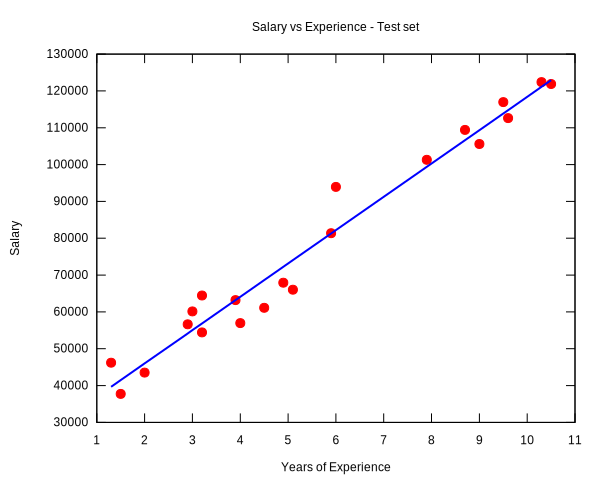

In [54]:
# Visualize training set results
Plot.new(
  [[x_train.to_a, y_train.to_a], notitle: true, with: 'points', pt: 7, ps: 1, lt: { rgb: 'red' }],
  [[x_train.to_a, model.predict(x_train).to_a], notitle: true, with: 'lines', lt: { rgb: 'blue', lw: 2 }],
  title: 'Salary vs Experience - Test set',
  xlabel: 'Years of Experience',
  ylabel: 'Salary'
).term('svg')

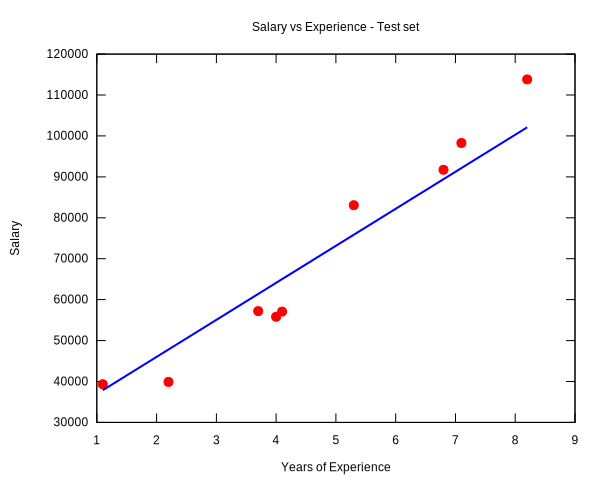

In [55]:
# Visualize test set results
Plot.new(
  [[x_test.to_a, y_test.to_a], notitle: true, with: 'points', pt: 7, lt: { rgb: 'red' }],
  [[x_test.to_a, y_pred.to_a], notitle: true, with: 'lines', lt: { rgb: 'blue', lw: 2 }],
  title: 'Salary vs Experience - Test set',
  xlabel: 'Years of Experience',
  ylabel: 'Salary'
).term('svg')

In [10]:
model.predict([[30],[60]])

Numo::DFloat#shape=[2,1]
[[308939], 
 [590835]]